In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('data/BIKES/bike_data.csv')
data.index = data['instant']
data = data.drop(['instant'], axis=1)

## Task
Predict the number of bike hirs for a given hour

## Data
### Features
- **instant** - A unique row identifier
- **dteday** - The date of the rentals
- **season** - The season in which the rentals occurred (1 = spring, 2 = summer, 3 = fall, 4 = winter)
- **yr** - The year the rentals occurred (0 = 2011, 1 = 2012)
- **mnth** - The month the rentals occurred (1 to 12)
- **hr** - The hour the rentals occurred (0 to 23)
- **holiday** - Whether or not the day was a holiday
- **weekday** - The day of the week (as a number, 0 to 6)
- **workingday** - Whether or not the day was a working day
- **weathersit** - The weather (1 = clear, few clouds, partly cloudy; 2 = mist and cloudy; 3 = light rain or snow; 4 = heavy rain or snow)
- **temp** - Normalized temperature in Celsius. 
- **atemp** - Normalized feeling temperature in Celsius.
- **hum** - Normalized humidity. 100 is the maximum.
- **windspeed** - Normalized wind speed. 67 is the maximum.
- **casual** - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- **registered** - The number of registered riders (people who had already signed up)
- **cnt** - The total number of bike rentals (casual + registered)

### Regression ideas:

Dummies:
* registered - applied to everything, essentially a second regression
* season?
* yr
* mnth
* weekday
* workingday

##### Seasonality regression
$$
pred_yr1 = \beta_0 + \beta_1 * season + \beta_2 * mnth
$$

In [77]:
data.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


# Regression functions

In [15]:
def linear_regression_data(data_inputs):
    return np.concatenate((np.ones((data_inputs.shape[0], 1)), data_inputs), axis=1)

def linear_regression(data_matrix, data_outputs):
    return np.linalg.solve(data_matrix.T.dot(data_matrix), data_matrix.T.dot(data_outputs))

def prediction_error(data_matrix,data_outputs,weights):
    return 1/(2 * len(data_matrix)) * np.linalg.norm(data_matrix.dot(weights) - data_outputs) ** 2

# PLOT SPAM!

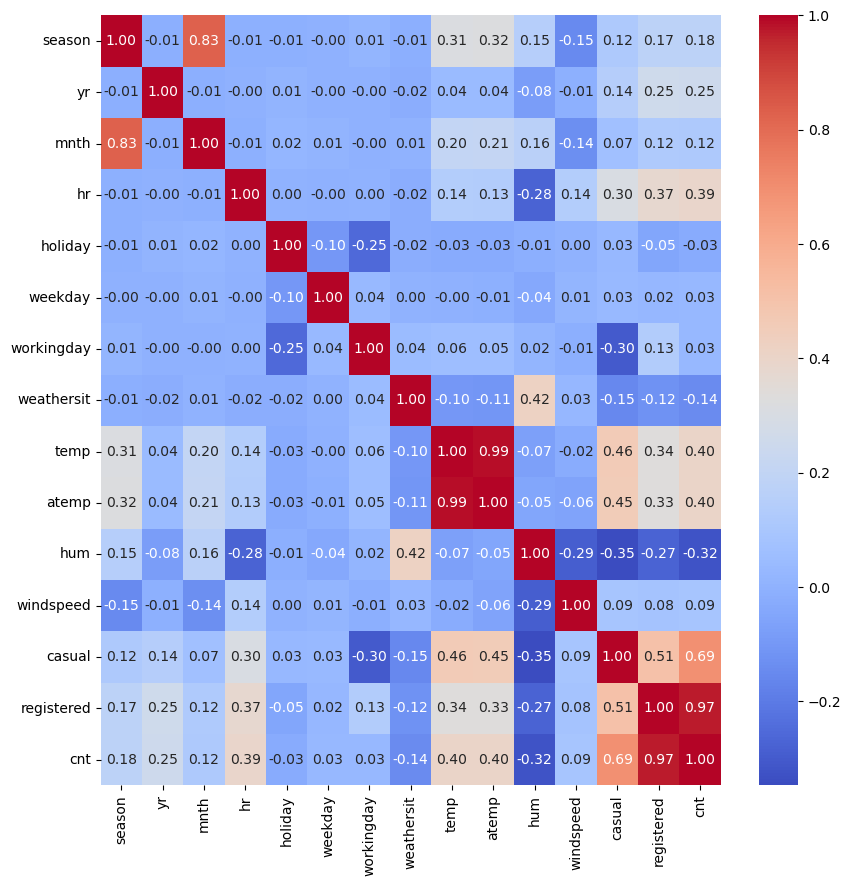

In [5]:
# Calculate correlation matrix
corr_matrix = data.select_dtypes(include='number').corr()

# Make the figsize 10 x 10
plt.figure(figsize=(10, 10))

# Create heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show plot
plt.show()

(array([ 5., 11., 22., 47., 36., 38., 54., 64., 61., 63., 41., 43., 46.,
        49., 28., 22., 13.,  9.,  9.,  9.,  3.,  9.,  8.,  8.,  7.,  6.,
         5.,  5.,  2.,  4.]),
 array([  8.        ,  19.43333333,  30.86666667,  42.3       ,
         53.73333333,  65.16666667,  76.6       ,  88.03333333,
         99.46666667, 110.9       , 122.33333333, 133.76666667,
        145.2       , 156.63333333, 168.06666667, 179.5       ,
        190.93333333, 202.36666667, 213.8       , 225.23333333,
        236.66666667, 248.1       , 259.53333333, 270.96666667,
        282.4       , 293.83333333, 305.26666667, 316.7       ,
        328.13333333, 339.56666667, 351.        ]),
 <BarContainer object of 30 artists>)

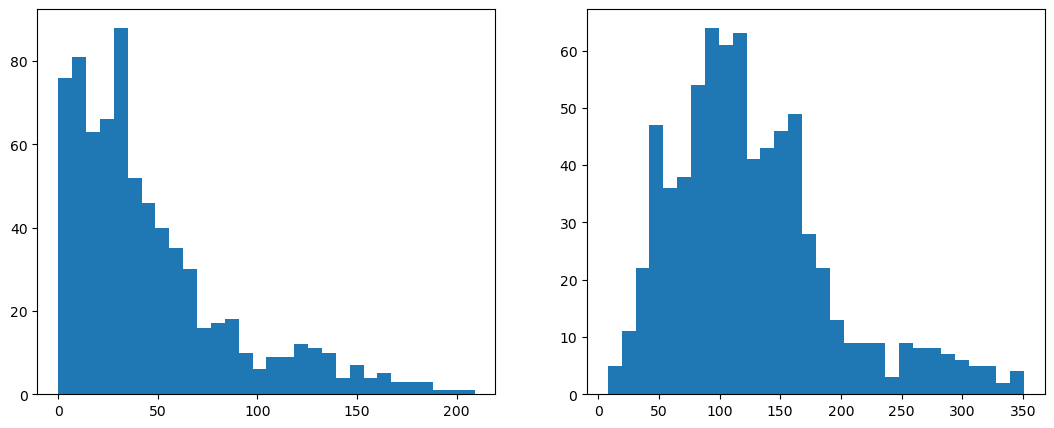

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

hour = 10

ax[0].hist(data.loc[data['hr']==hour, 'casual'], bins=30)
ax[1].hist(data.loc[data['hr']==hour, 'registered'], bins=30)

Avg and variance in year 0: 143.79444765760556, 17901.86577203697
Avg and variance in year 1: 234.6663613464621, 43643.7812638227


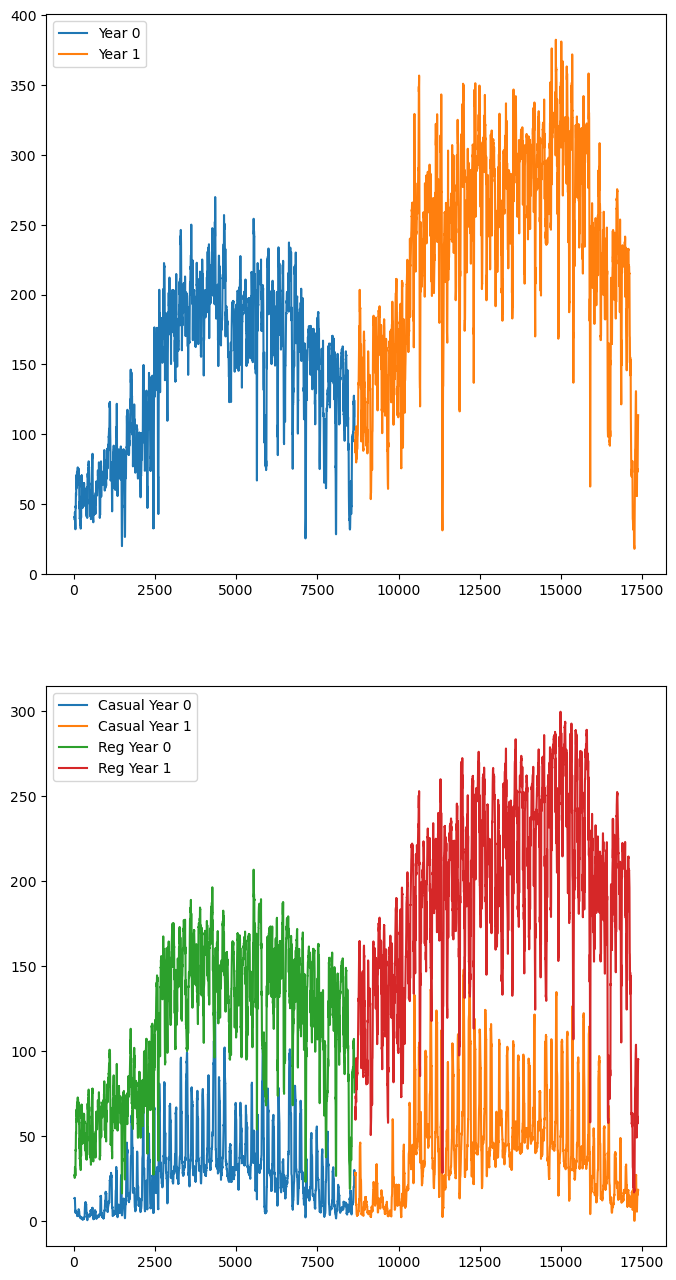

In [8]:
# Exploring differences between year 0 and year 1
print(f"Avg and variance in year 0: {data.loc[data['yr']==0, 'cnt'].mean()}, {data.loc[data['yr']==0, 'cnt'].var()}")
print(f"Avg and variance in year 1: {data.loc[data['yr']==1, 'cnt'].mean()}, {data.loc[data['yr']==1, 'cnt'].var()}")

fig, ax = plt.subplots(2, 1, figsize=(8, 16))

ax[0].plot(data.loc[data['yr']==0, 'cnt'].rolling(24).mean(), label='Year 0')
ax[0].plot(data.loc[data['yr']==1, 'cnt'].rolling(24).mean(), label='Year 1')
ax[1].plot(data.loc[data['yr']==0, 'casual'].rolling(24).mean(), label='Casual Year 0')
ax[1].plot(data.loc[data['yr']==1, 'casual'].rolling(24).mean(), label='Casual Year 1')
ax[1].plot(data.loc[data['yr']==0, 'registered'].rolling(24).mean(), label='Reg Year 0')
ax[1].plot(data.loc[data['yr']==1, 'registered'].rolling(24).mean(), label='Reg Year 1')
ax[0].legend()
ax[1].legend()

It is clear that although in 2012 the overall trends in the data remain, there is a significant increase in the number of bike rentals compared to 2011. 

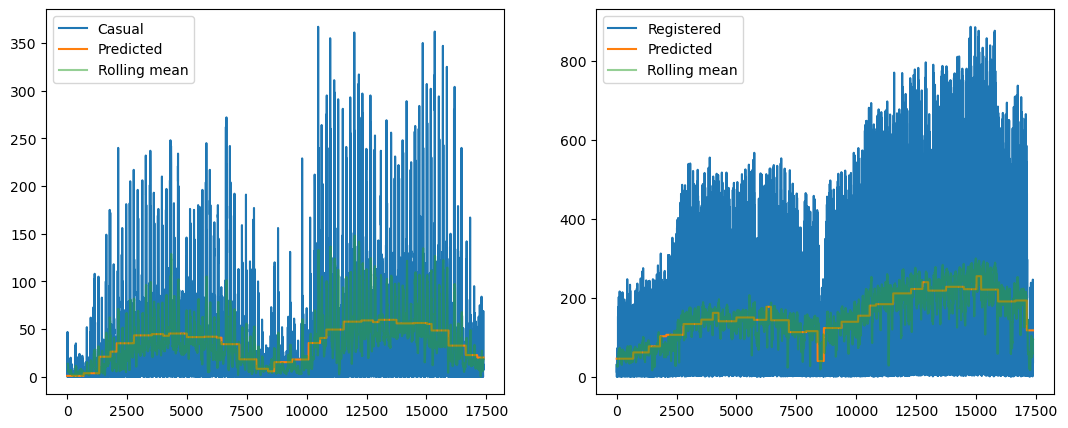

In [94]:
# Regressing casual and registered consumers on year and month
yr = np.array(data['yr'])
mnth = np.array(pd.get_dummies(data['mnth']).values)
season = np.array(pd.get_dummies(data['season']).values)
seasonality_data = linear_regression_data(np.concatenate([yr[:, None], mnth, season], axis=1))

weights_casual = linear_regression(seasonality_data, data['casual'])
weights_registered = linear_regression(seasonality_data, data['registered'])

# Plotting the regressions
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].plot(data['casual'], label='Casual')
ax[0].plot(seasonality_data.dot(weights_casual), label='Predicted')
ax[0].plot(data['casual'].rolling(24).mean(), label='Rolling mean', alpha=0.5)
ax[1].plot(data['registered'], label='Registered')
ax[1].plot(seasonality_data.dot(weights_registered), label='Predicted')
ax[1].plot(data['registered'].rolling(24).mean(), label='Rolling mean', alpha=0.5)
ax[0].legend()
ax[1].legend()

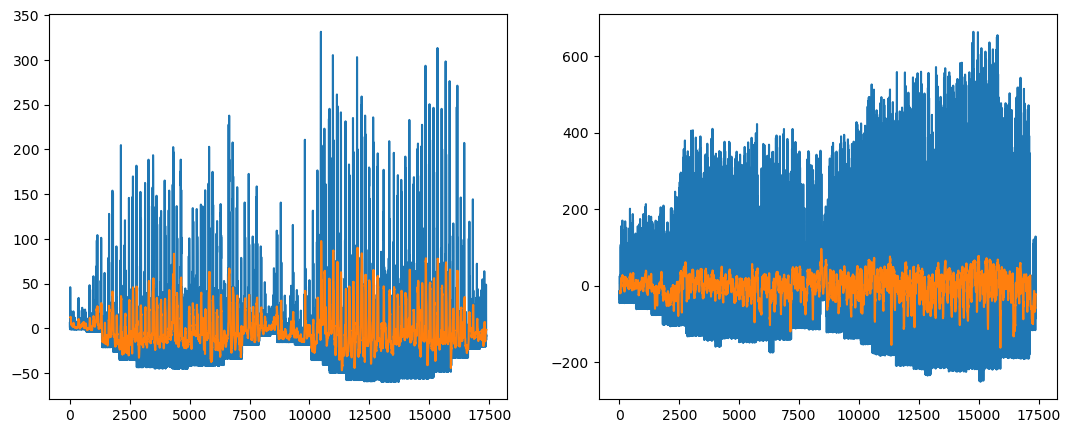

In [95]:
data_left = data.copy()
data_left['casual'] = data_left['casual'] - seasonality_data.dot(weights_casual)
data_left['registered'] = data_left['registered'] - seasonality_data.dot(weights_registered)

# Plotting the residuals
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].plot(data_left['casual'], label='Casual')
ax[0].plot(data_left['casual'].rolling(24).mean(), label='Rolling mean')
ax[1].plot(data_left['registered'], label='Registered')
ax[1].plot(data_left['registered'].rolling(24).mean(), label='Rolling mean')

This looks good. The means of the residuals of the casual riders are far from zero and these of the registered riders are closer to zero. This makes sense as the registered riders are more likely to be regular riders and therefore their behaviour is less dependent on the weather, which we haven't accounted for.

Now we want to tey to extract even more information from the data. I will regress the residuals on the rest of the features.

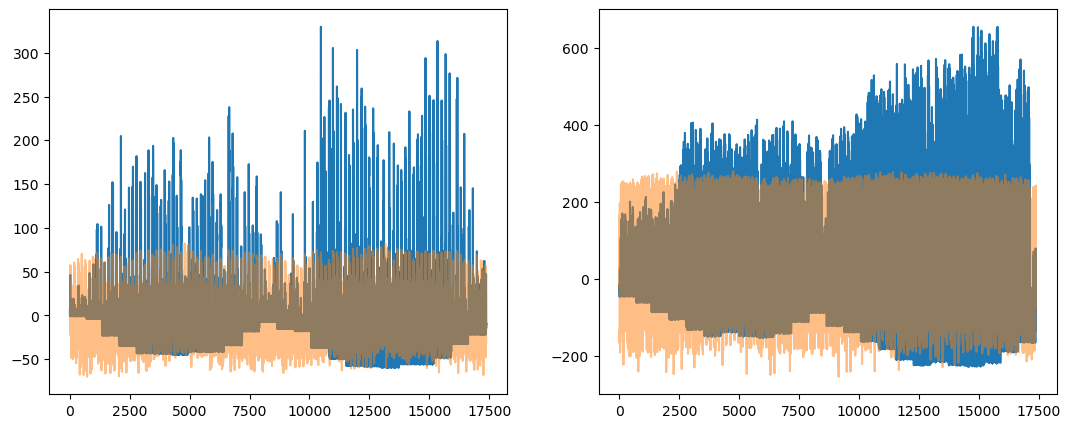

In [66]:
hr = np.array(pd.get_dummies(data['hr']).values)
holiday = np.array(data['holiday'])
weekday = np.array(pd.get_dummies(data['weekday']).values)
workingday = np.array(data['workingday'])
weathersit = np.array(pd.get_dummies(data['weathersit']).values)
atemp = np.array(data['atemp'])
hum = np.array(data['hum'])
windspeed = np.array(data['windspeed'])

data_inputs = np.concatenate([hr, holiday[:, None], weekday, workingday[:, None], weathersit, temp[:, None], atemp[:, None], hum[:, None], windspeed[:, None]], axis=1)
reg_inputs = linear_regression_data(data_inputs)

weights_casual = linear_regression(reg_inputs, data_left['casual'])
weights_registered = linear_regression(reg_inputs, data_left['registered'])

# Plotting the regressions
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].plot(data_left['casual'], label='Casual')
ax[0].plot(reg_inputs.dot(weights_casual), label='Predicted', alpha=0.5)
ax[1].plot(data_left['registered'], label='Registered')
ax[1].plot(reg_inputs.dot(weights_registered), label='Predicted', alpha=0.5)

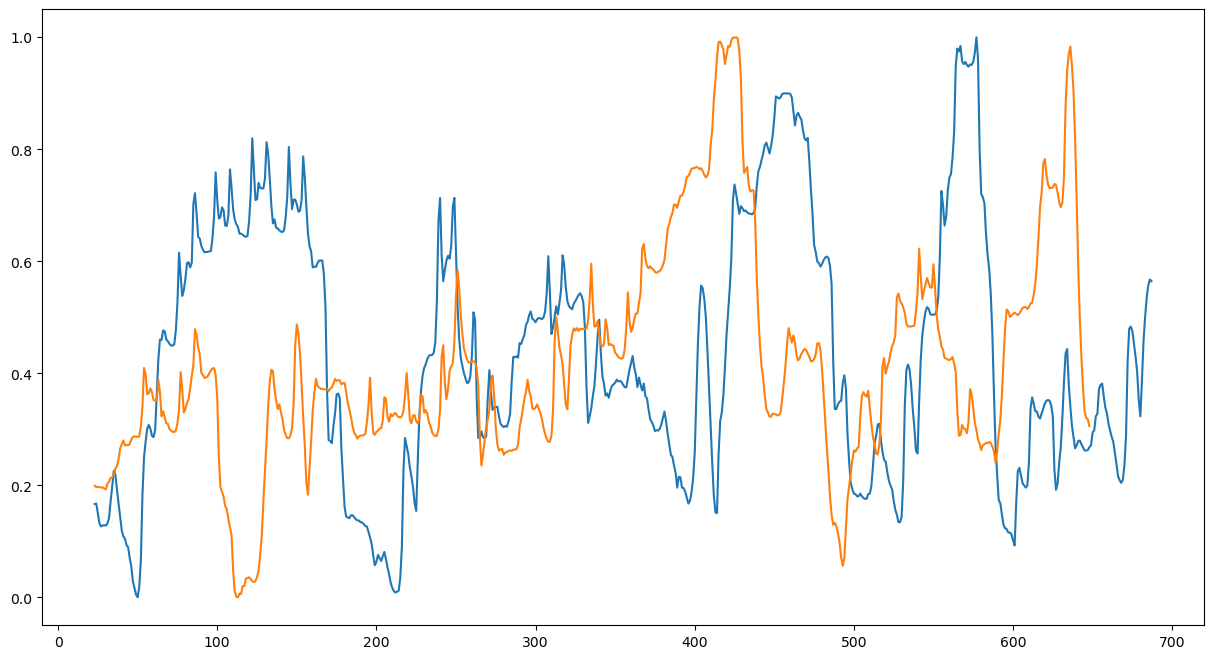

In [9]:
# Exploring differences between the 12 months within the first year
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for month in range(1, 3):
    # Reset the index before plotting
    data_to_plot = data.loc[(data['yr']==0) & (data['mnth']==month), 'cnt'].rolling(24).mean()
    
    # Normalize the data
    data_to_plot = (data_to_plot - data_to_plot.min()) / (data_to_plot.max() - data_to_plot.min())
    
    # Reset the index after normalization
    data_to_plot = data_to_plot.reset_index(drop=True)
    
    ax.plot(data_to_plot, label=f'Month {month}')

Text(0.5, 1.0, 'Registered riders by hour')

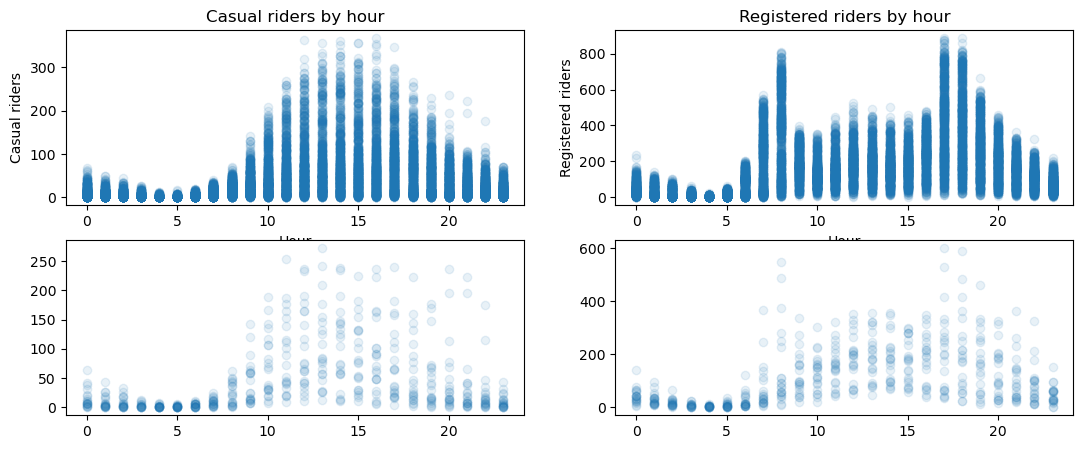

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(13, 5))


scatter0 = ax[0,0].scatter(data['hr'], data['casual'], alpha=0.1)
scatter1 = ax[0,1].scatter(data['hr'], data['registered'], alpha=0.1)

scatter0 = ax[1,0].scatter(data.loc[data['holiday']==1]['hr'], data.loc[data['holiday']==1]['casual'], alpha=0.1)
scatter1 = ax[1,1].scatter(data.loc[data['holiday']==1]['hr'], data.loc[data['holiday']==1]['registered'], alpha=0.1)

ax[0,0].set_xlabel('Hour')
ax[0,1].set_xlabel('Hour')
ax[0,0].set_ylabel('Casual riders')
ax[0,1].set_ylabel('Registered riders')
ax[0,0].set_title('Casual riders by hour')
ax[0,1].set_title('Registered riders by hour')

## Notes to self
Will have to predict casual and registered separately and then add them together to get the total count. 

It seems that the registered customers are the ones who are using the bikes for commuting to work and back, while the casual customers are the ones who are using the bikes for leisure. 